<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        IMPORTING LIBRARIES
    </h1>
    </div>

the order for the deployment: [Florida, New York, R&D Spend, Administration, Marketing Spend]

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,OneHotEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression,SelectKBest
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import AllKNN
from sklearn.pipeline import Pipeline

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Data Preprocessing
    </h1>
    </div>

In [2]:
data = pd.read_csv("Companies.csv")
data.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


As we see below the average spend on Marketing is the Highest then Adminstration then R&D

In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [5]:
# Extracting the Profit when the Marketing and R&D Spend were zero
data[(data["Marketing Spend"] == 0) & (data["R&D Spend"] == 0)]

,R&D Spend,Administration,Marketing Spend,State,Profit
47,0.0,135426.92,0.0,California,42559.73


In [6]:
data.groupby("State")[["Profit"]].mean()

,Profit
State,
California,119366.449481
Florida,120556.909766
New York,118756.829609


In [7]:
# Extracting the Profit when the Marketing Spend was zero
data[data["Marketing Spend"]==0]

,R&D Spend,Administration,Marketing Spend,State,Profit
19,86419.70,153514.11,0.0,New York,122776.86
47,0.00,135426.92,0.0,California,42559.73
48,542.05,51743.15,0.0,New York,35673.41


In [8]:
# Extracting the Profit when the R&D Spend was zero
data[data["R&D Spend"]==0]

,R&D Spend,Administration,Marketing Spend,State,Profit
47,0.0,135426.92,0.00,California,42559.73
49,0.0,116983.80,45173.06,California,14681.40


In [9]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
data[((data["Marketing Spend"] == 0) | (data["R&D Spend"] == 0))].shape[0]

4

In [11]:
# Removing Zeros from our Data
data = data[~((data["Marketing Spend"] == 0) | (data["R&D Spend"] == 0))]

In [12]:
data.shape

(996, 5)

In [13]:
data.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
      dtype='int64', length=996)

In [14]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [15]:
data[data.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit
755,84533.0,122941.3141,231885.6935,California,121248.7116


Removing Duplicated Records

In [16]:
data.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [17]:
data.groupby("State").mean()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,81267.361173,123309.398030,225101.948490,119893.163578
Florida,83677.876584,122784.720553,231368.018870,120556.909766
New York,80846.343464,122885.854130,224902.810705,118994.972348


In [18]:
data.groupby("State").median()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,79009.000,122317.05150,222388.68110,117637.62200
Florida,83966.500,122851.81725,232027.51200,120764.75555
New York,78325.235,122204.58970,221020.66365,114935.92550


In [19]:
data.groupby("State").min()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,2296.00,51283.14,28334.72000,50994.35213
Florida,1315.46,84710.77,72022.53327,49490.75000
New York,1000.23,65947.93,1903.93000,50070.86316


In [20]:
data.groupby("State").max()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,162597.7,321652.14,443898.53,413956.48
Florida,159570.0,182645.56,407934.54,191050.39
New York,165349.2,270939.86,471784.10,476485.43


In [21]:
data.pivot_table(index='State',margins=True,margins_name='Total',aggfunc=np.median)

,Administration,Marketing Spend,Profit,R&D Spend
State,,,,
California,122317.05150,222388.68110,117637.62200,79009.000
Florida,122851.81725,232027.51200,120764.75555,83966.500
New York,122204.58970,221020.66365,114935.92550,78325.235
Total,122417.62470,225043.67680,117645.31060,79974.000


In [22]:
data.State.value_counts()

State
California    341
New York      332
Florida       322
Name: count, dtype: int64

Removing outliers from the dataset

In [23]:
q1 = np.quantile(data["Profit"],0.25)
q3 = np.quantile(data["Profit"],0.75)

In [24]:
q1 = np.quantile(data["Profit"],0.25)
q3 = np.quantile(data["Profit"],0.75)
iqr = q3 - q1
high_thresh = q3 + 1.5 * iqr
low_thresh = q1 - 1.5  * iqr
def filterize(data):
    if data >= low_thresh and data <= high_thresh:
        return True
    else:
        return False

In [25]:
data = data[data["Profit"].apply(filterize)]

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Data Visualization
    </h1>
    </div>

### Visualizing Numericals

In [26]:
num = data.select_dtypes("number").columns.to_list()
cat = data.select_dtypes("object").columns.to_list()

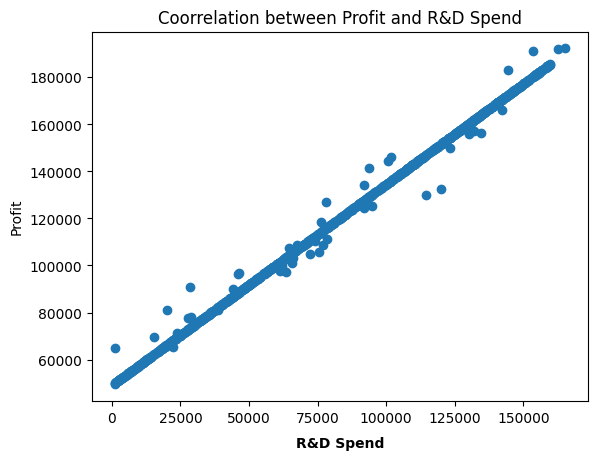

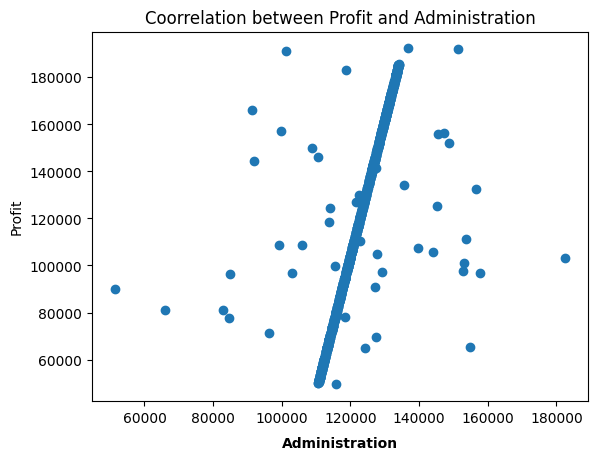

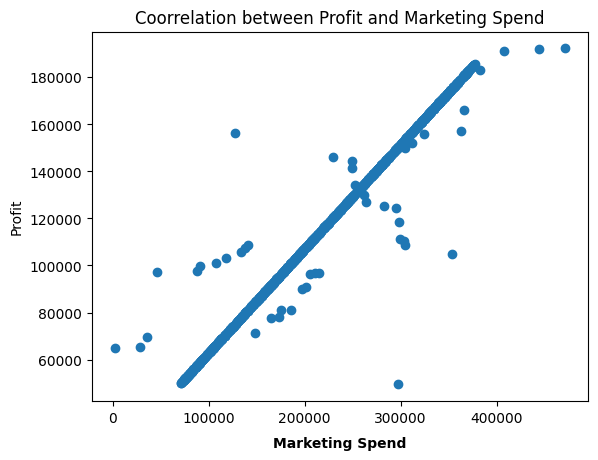

In [27]:
for i in range(len(num)-1):
    plt.scatter(x=data.loc[:,num[i]],y=data.iloc[:,-1])
    plt.title(f"Coorrelation between Profit and {num[i]}")
    plt.xlabel(num[i],labelpad=8,weight='bold')
    plt.ylabel('Profit')
    plt.show()

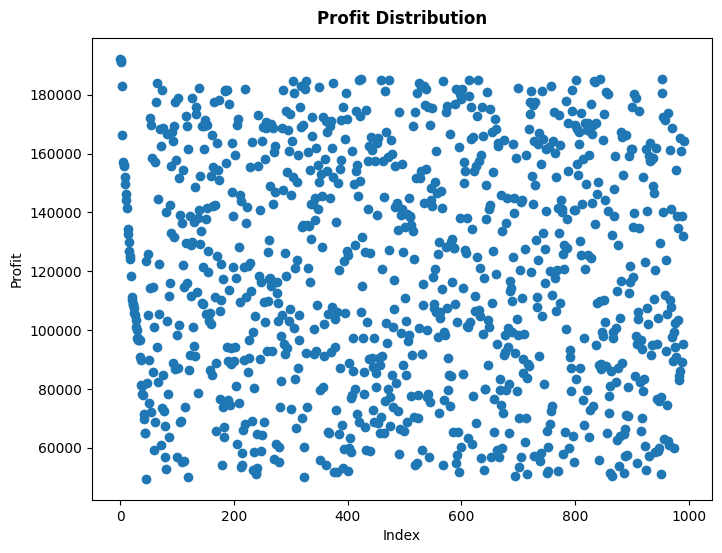

In [28]:
plt.figure(figsize=(8,6))
plt.title("Profit Distribution",weight='bold',pad=10)
plt.scatter(x=range(data.shape[0]),y=data["Profit"])
plt.xlabel("Index")
plt.ylabel("Profit")
plt.show()

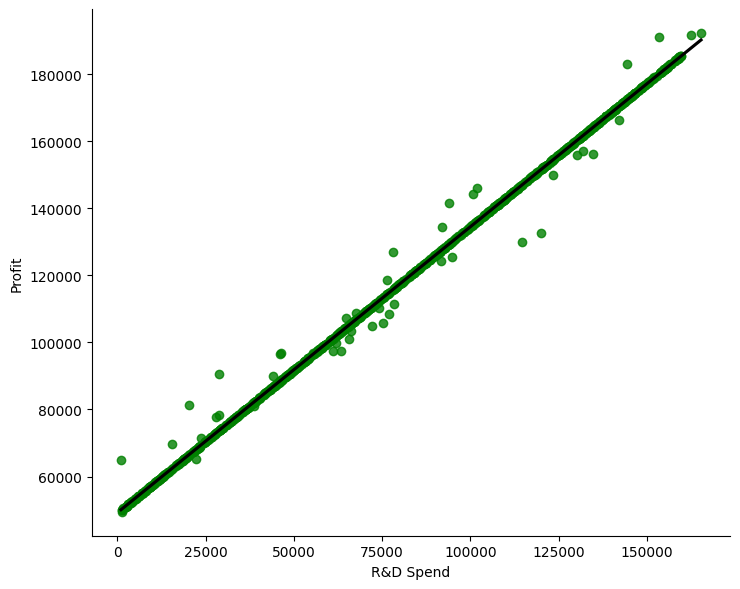

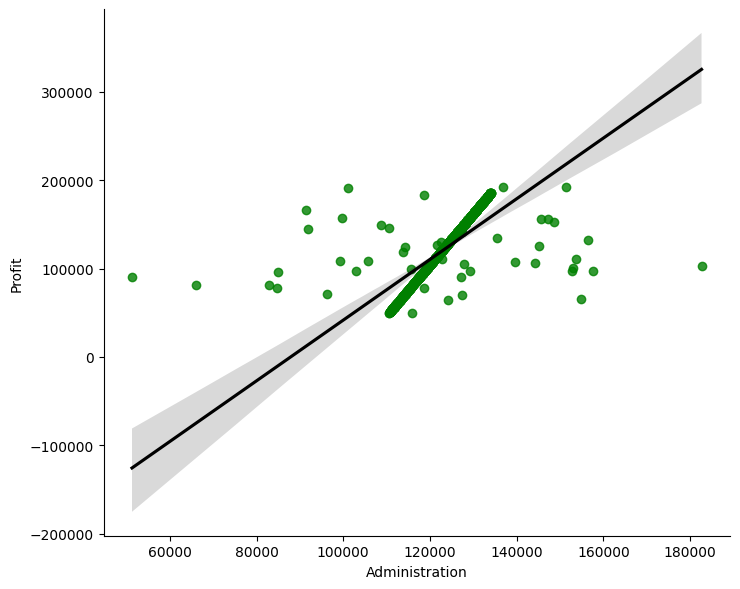

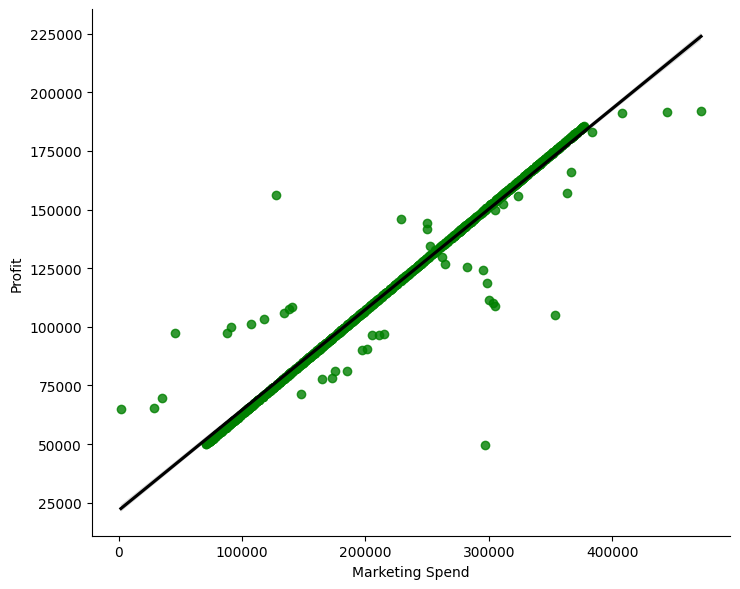

In [29]:
for i in range(len(num)-1):
    sns.lmplot(data=data,x=num[i],y='Profit',height=6,aspect=1.25,scatter_kws={"color":"green"},line_kws={"color":"black"})

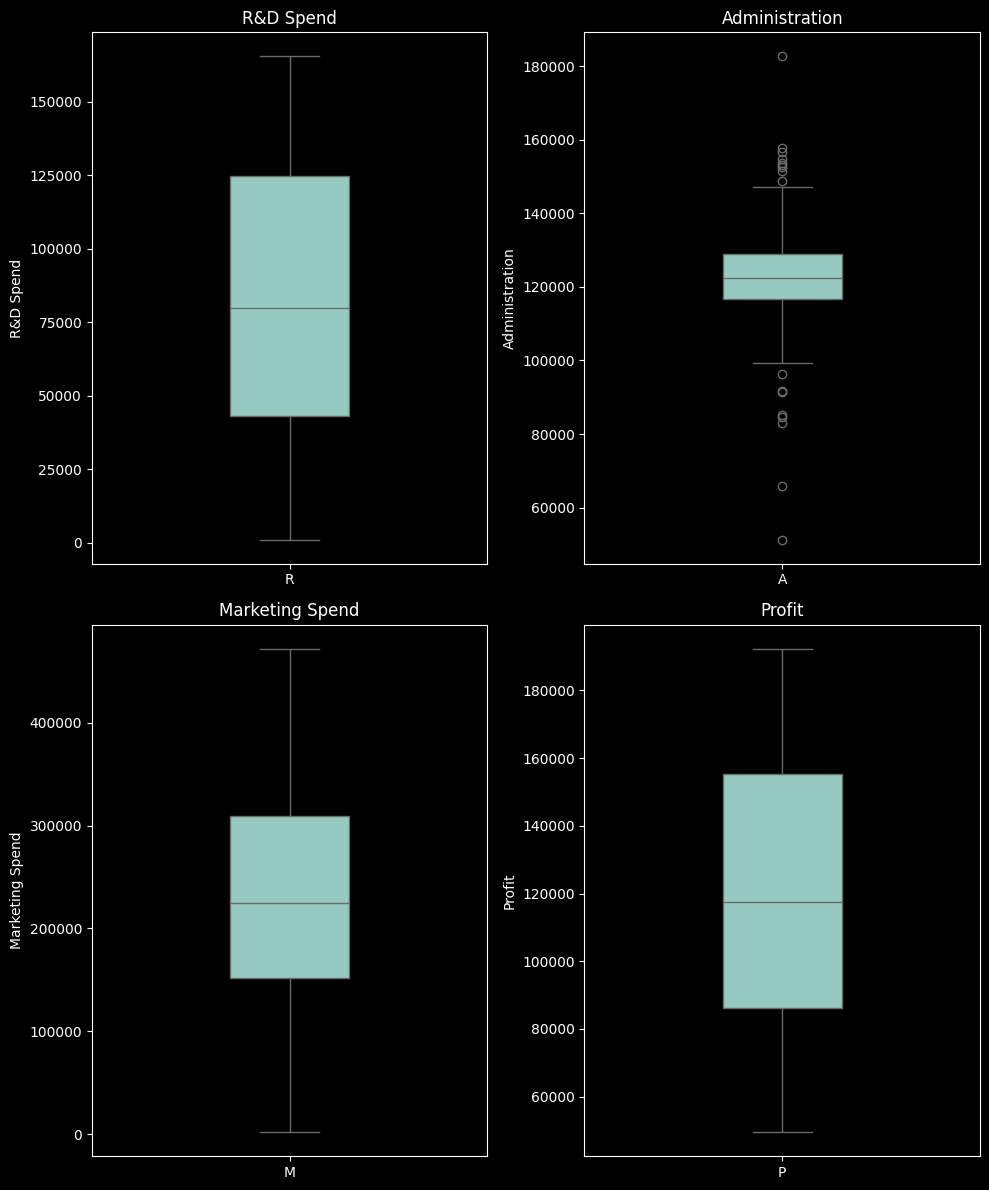

In [30]:
with plt.style.context("dark_background"):
    nrows = 2
    ncols = 2
    f,ax = plt.subplots(nrows=2,ncols=2)
    f.set_size_inches(w=10,h=12)
    k = 0
    for i in range(nrows):
        for j in range(ncols):
            sns.boxplot(data=data,y=num[k],ax = ax[i,j],width=0.3)
            ax[i,j].set_title(f"{num[k]}")
            ax[i,j].set_xticklabels(num[k])
            k += 1
            plt.tight_layout()

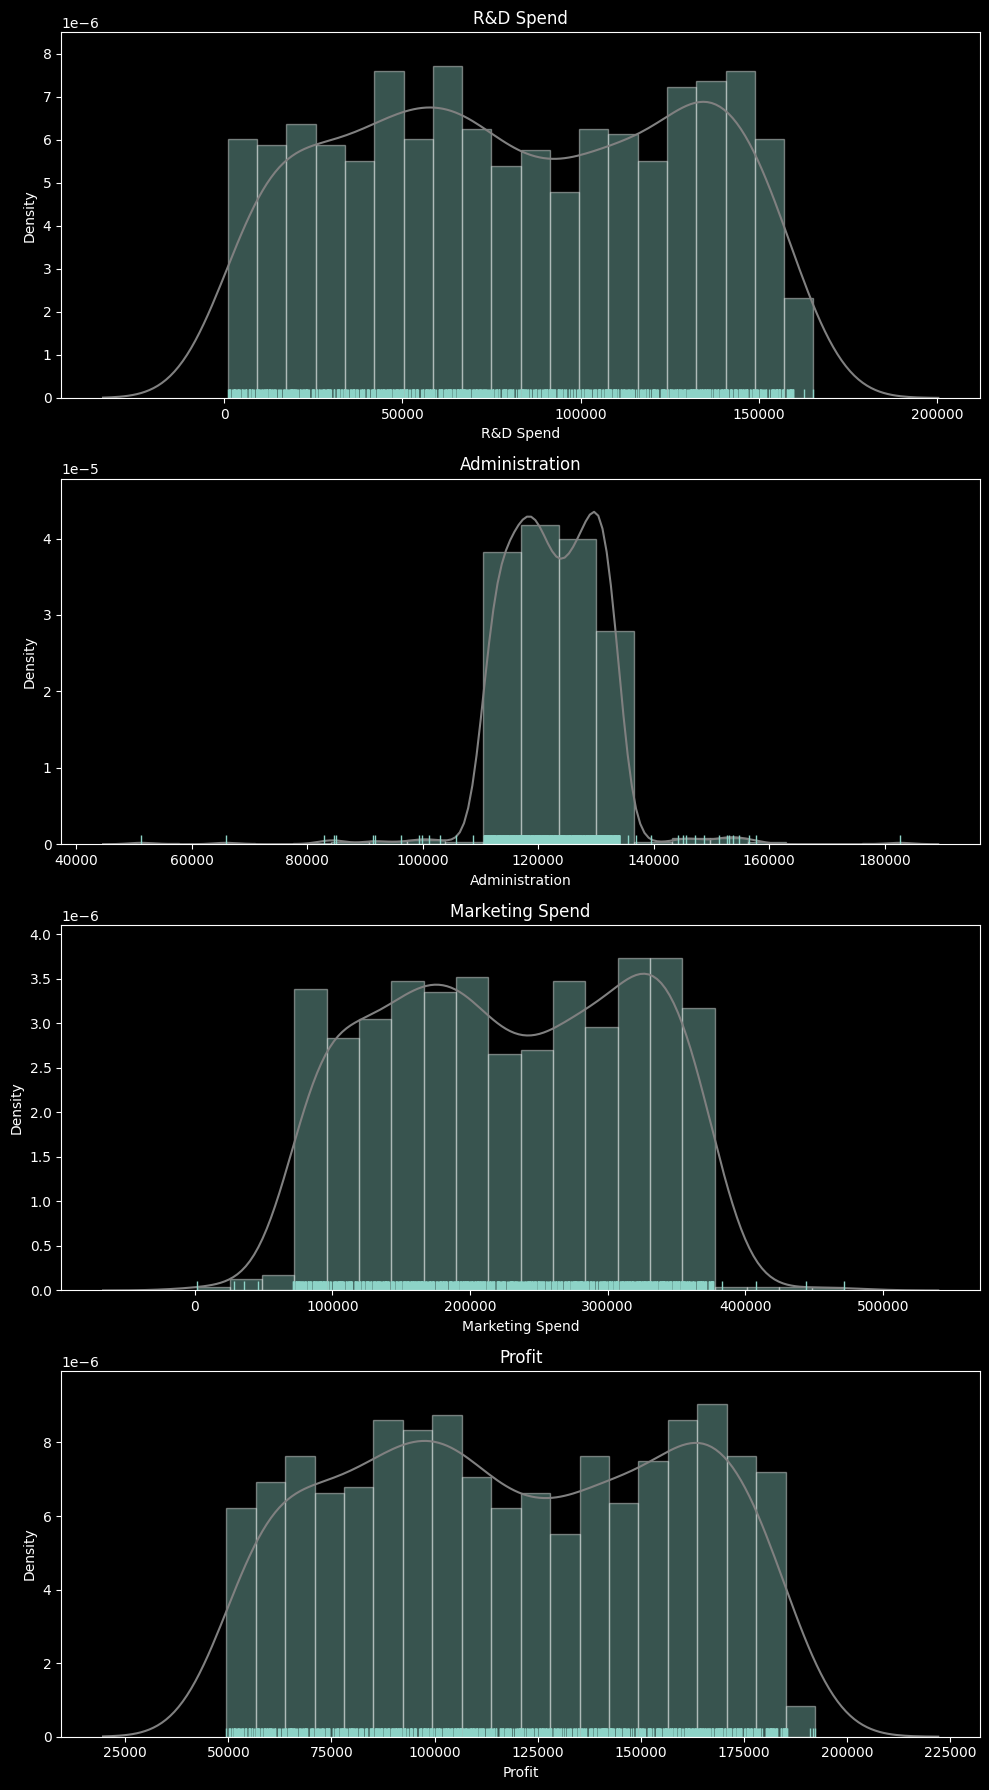

In [31]:
with plt.style.context("dark_background"):
    f,ax = plt.subplots(nrows=4)
    f.set_size_inches(w=10,h=18)
    k = 0
    for i in range(len(num)):
            sns.distplot(data[num[i]],bins=20,hist=True,kde=True,rug=True,hist_kws={"edgecolor":"white"},kde_kws={"color":"gray"},ax = ax[i])
            ax[i].set_title(f"{num[i]}")
            plt.tight_layout()

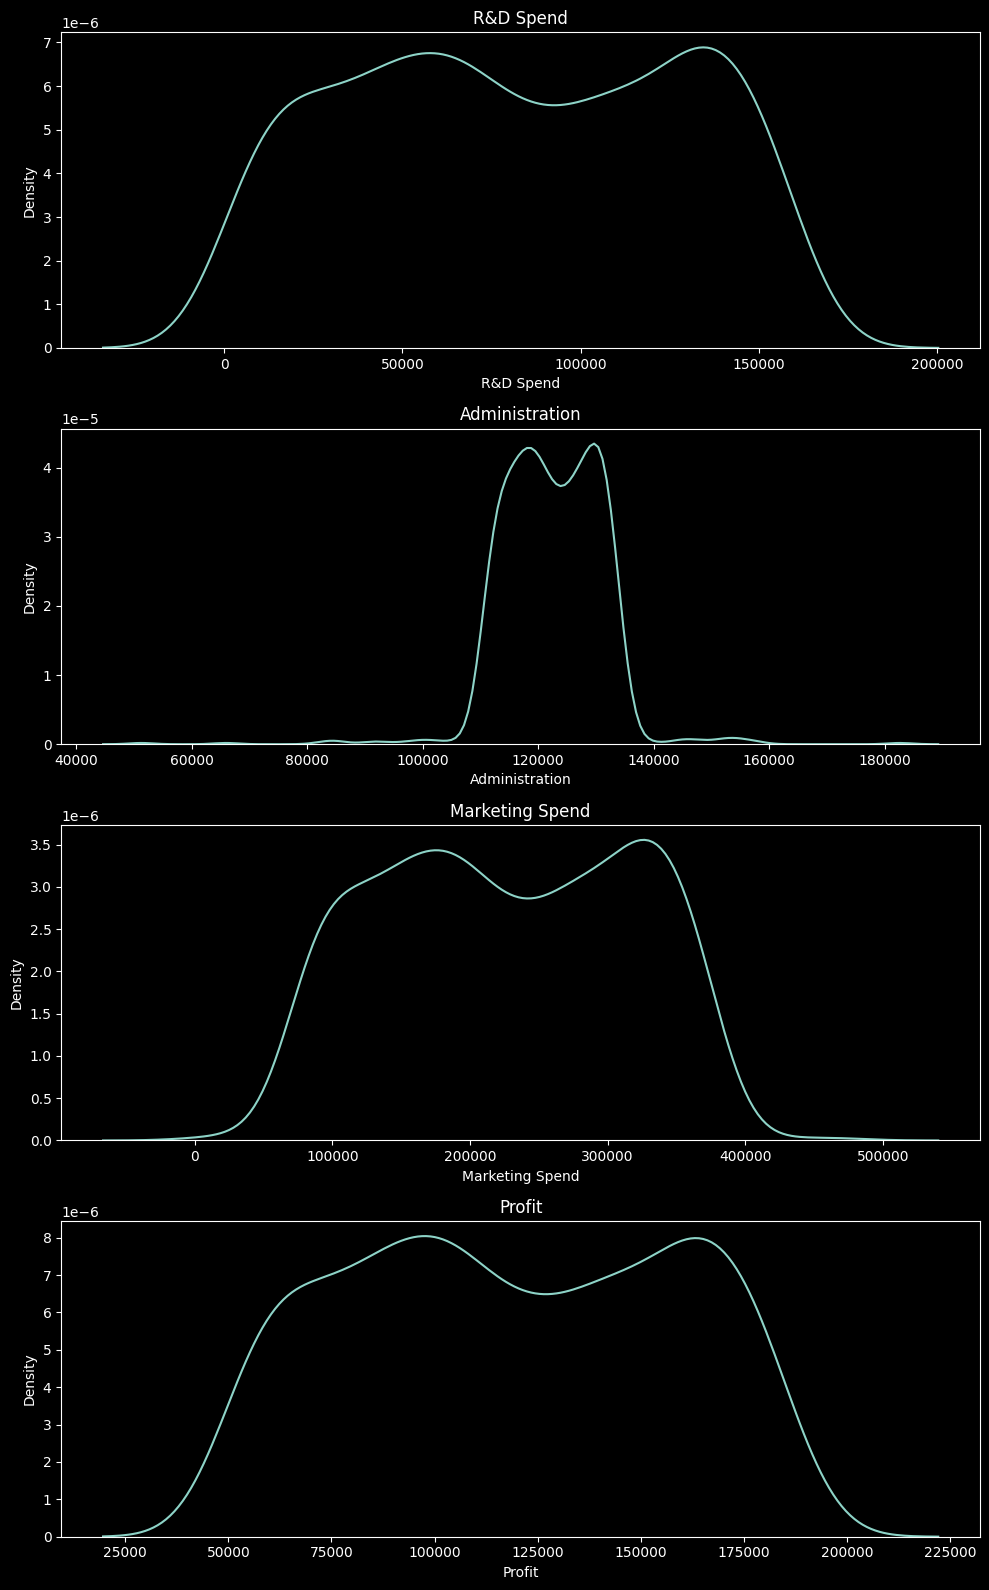

In [32]:
with plt.style.context("dark_background"):
    f,ax = plt.subplots(nrows=4)
    f.set_size_inches(w=10,h=16)
    k = 0
    for i in range(len(num)):
            sns.kdeplot(data=data,x=num[i],ax = ax[i])
            ax[i].set_title(f"{num[i]}")
            plt.tight_layout()

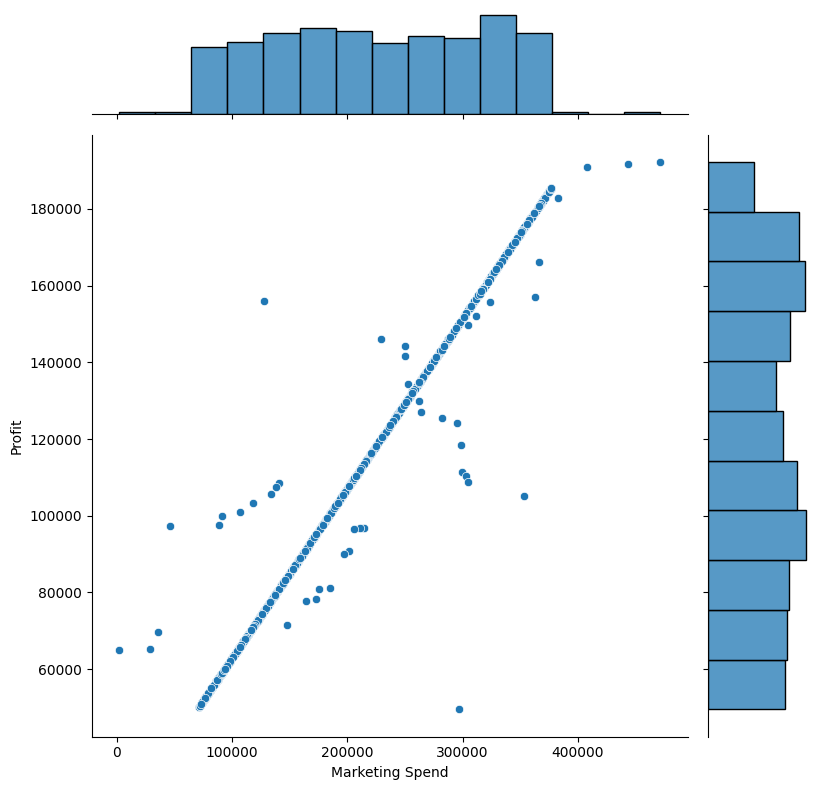

In [33]:
sns.jointplot(data=data,y='Profit',x='Marketing Spend',height=8)
plt.show()

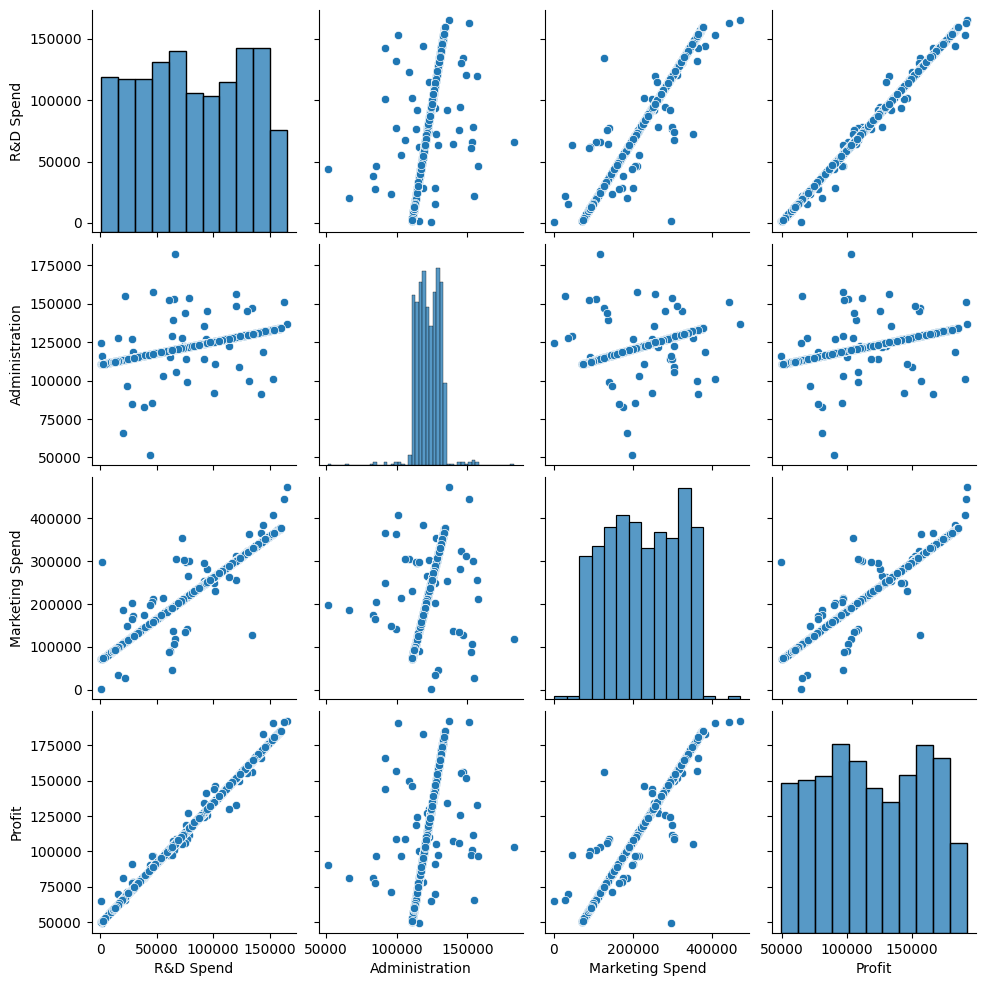

In [34]:
sns.pairplot(data)

In [35]:
data[["State"]].value_counts()

State     
California    339
New York      331
Florida       322
Name: count, dtype: int64

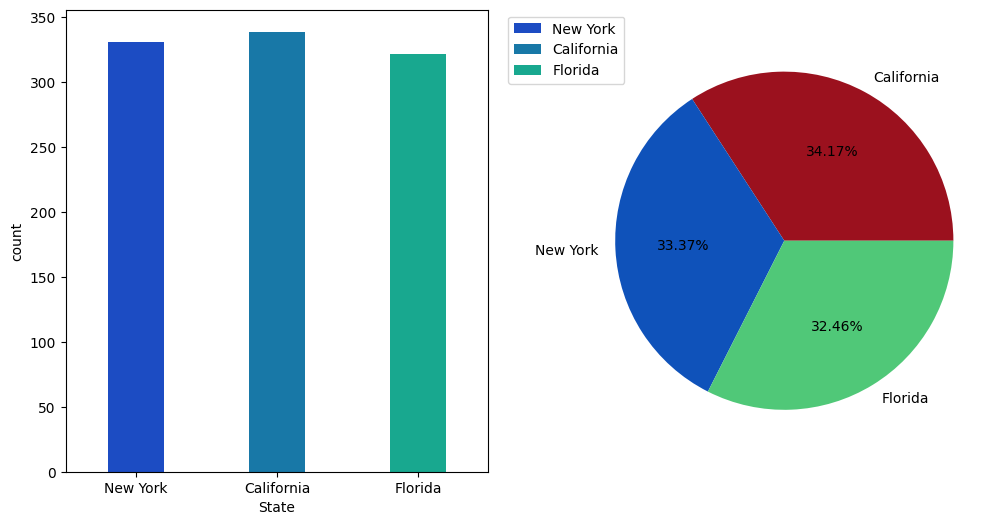

In [36]:
f,ax = plt.subplots(1,2)
f.set_size_inches(12,6)
sns.countplot(data=data,x='State',hue='State',palette='winter',width=0.4,legend='full',ax=ax[0])
ax[0].legend(bbox_to_anchor=(1.03,1))
ax[1].pie(x=data["State"].value_counts().values,labels=data["State"].value_counts().index,colors=["#9B111E", "#0F52BA","#50C878"],autopct="%0.2f%%")
plt.show()

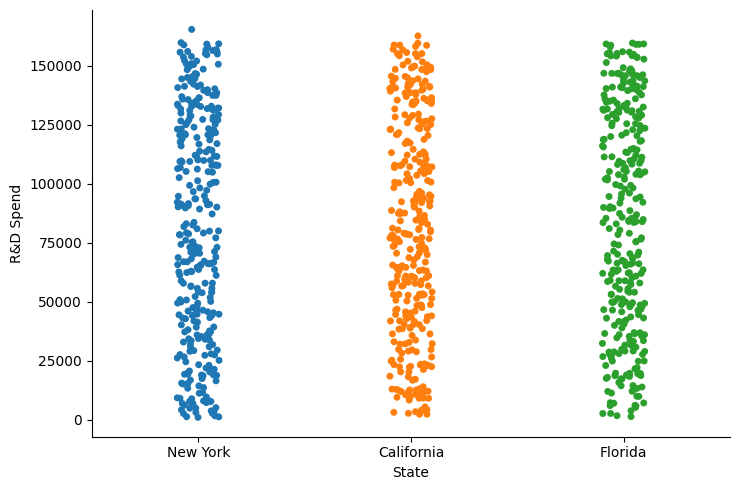

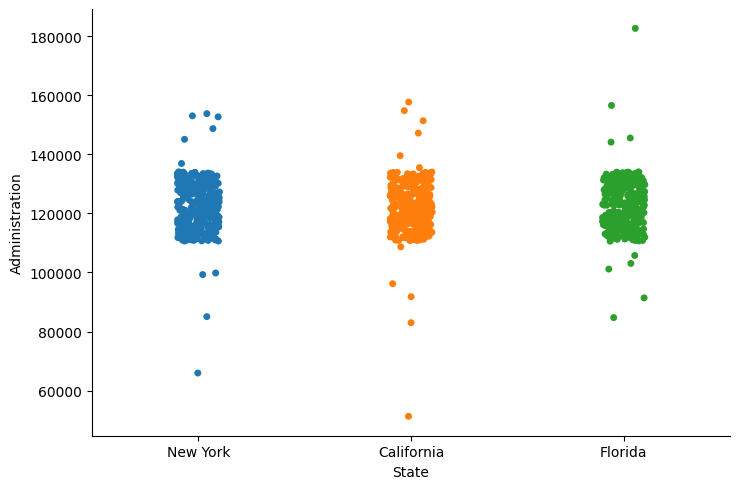

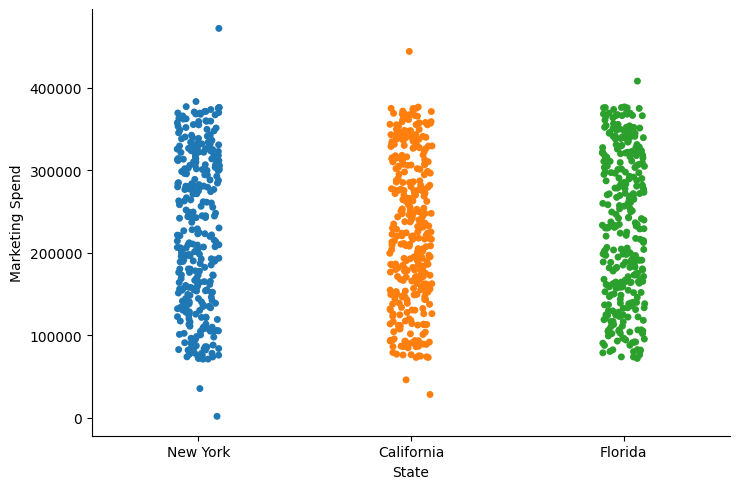

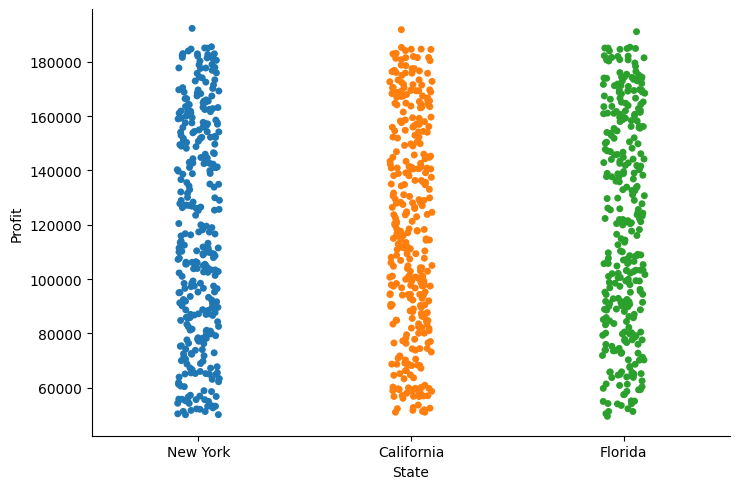

In [37]:
for i in range(len(num)):
    sns.catplot(data=data,x="State",y=num[i],hue="State",aspect=1.5)

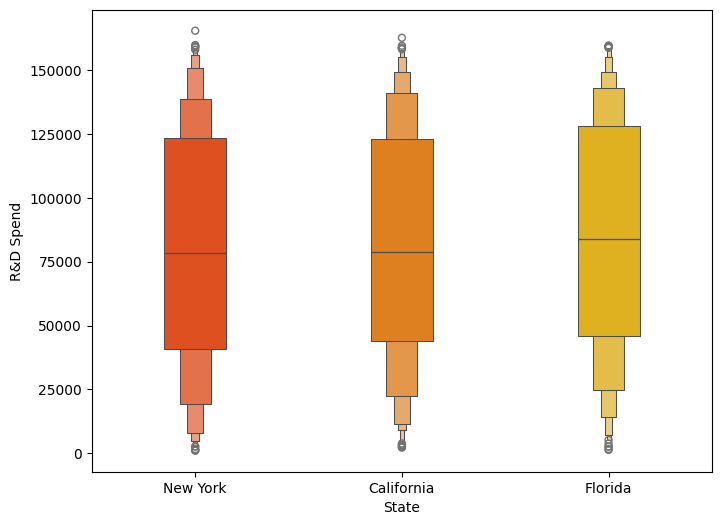

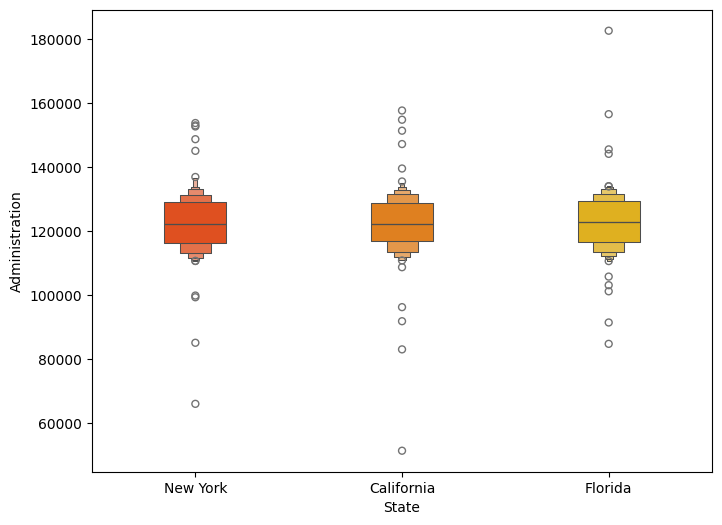

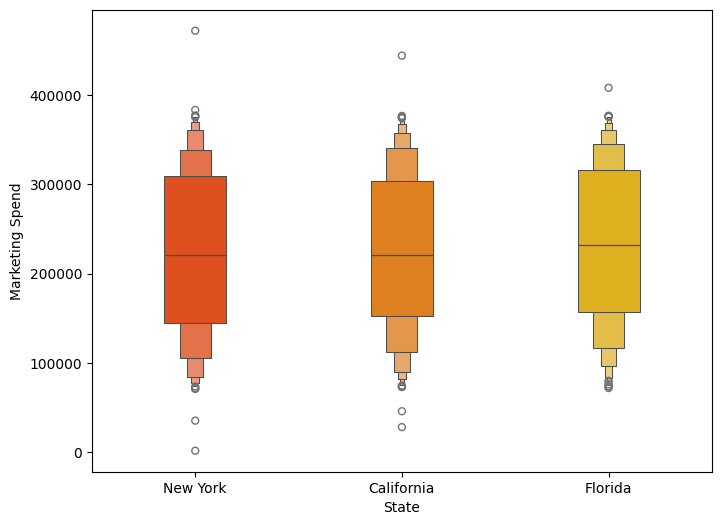

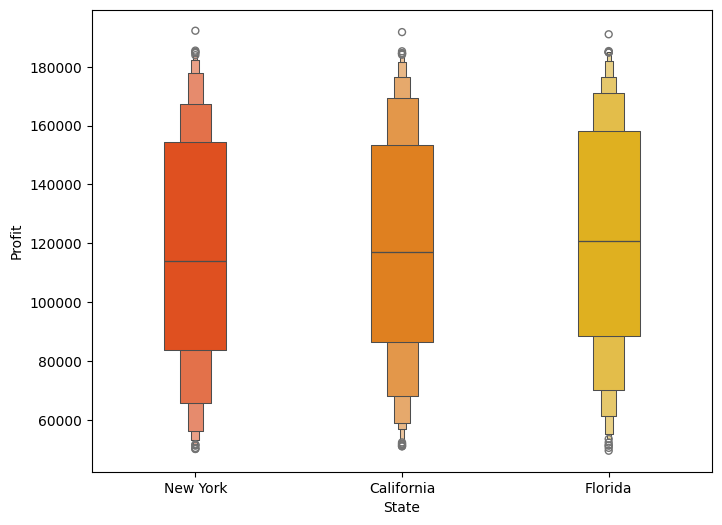

In [38]:
for i in range(len(num)):
    plt.figure(figsize=(8,6))
    sns.boxenplot(data=data,x="State",y=num[i],hue="State",width=0.3,palette='autumn')
    plt.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Feature Engineering
    </h1>
    </div>

Data is likely to cluster around the median so i will Standard scale features

In [39]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.8000,471784.1000,New York,192261.83000
1,162597.70,151377.5900,443898.5300,California,191792.06000
2,153441.51,101145.5500,407934.5400,Florida,191050.39000
3,144372.41,118671.8500,383199.6200,New York,182901.99000
4,142107.34,91391.7700,366168.4200,Florida,166187.94000
...,...,...,...,...,...
987,105127.00,125982.7298,271621.8728,Florida,138841.98810
988,46798.00,117368.4374,159075.9080,California,89012.02672
989,97209.00,124813.3635,256344.0701,New York,132077.70900
990,54135.00,118451.9990,173232.6695,California,95279.96251


In [40]:
sc = StandardScaler()
data.iloc[:,:-2] = sc.fit_transform(data.iloc[:,:-2])

Turning the Categories into numerical represetation using one hot encoding

In [41]:
data = pd.concat((pd.get_dummies(data["State"],drop_first=True).astype(int),data),axis=1)

In [42]:
data.drop("State",axis=1,inplace=True)

Now we have to split the data into train and test portions

In [43]:
x_train,x_test,y_train,y_test = train_test_split(data.drop("Profit",axis=1),data["Profit"],test_size=0.2)

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Modeling
    </h1>
    </div>

In [44]:
def cross(model,name):
    acc = cross_val_score(model,x_train,y_train,cv=5)
    print(f"Values of 5 Cross Validation Scores: {list(acc)}")

def train_evaluation(model,name):
    training_pred = model.predict(x_train)
    print(f"R2 Score: {r2_score(y_train,training_pred):.3f}")
    print(f"Mean Squared Error: {mean_squared_error(y_train,training_pred):.3f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_train,training_pred):.3f}")

def test_evaluation(model,name):
    testing_pred = model.predict(x_test)
    print(f"R2 Score: {r2_score(y_test,testing_pred):.3f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test,testing_pred):.3f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test,testing_pred):.3f}")

def plot_predictions(x_test,pred):
    plt.figure(figsize=(8,6))
    plt.title("Prediction VS Real Values",weight='bold',pad=8,fontsize=16)
    plt.scatter(x_test,y_test,c='b')
    plt.scatter(x_test,pred,c='g',alpha=0.5)
    plt.legend(labels=["True","Predicted"])
    plt.xlabel('X')
    plt.ylabel("Profit")
    plt.show()

# Linear Regression

In [45]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
train_evaluation(lr,"Linear Regression")

R2 Score: 0.998
Mean Squared Error: 2435988.453
Mean Absolute Error: 367.444


In [47]:
test_evaluation(lr,"Linear Regression")

R2 Score: 0.998
Mean Squared Error: 3317838.668
Mean Absolute Error: 469.463


In [48]:
cross(lr,"Linear Regression")

Values of 5 Cross Validation Scores: [0.9973338732670923, 0.9958773236541193, 0.9988012026151949, 0.9992066006562927, 0.9996201494216691]


In [49]:
pred = lr.predict(x_test)

We have to Project x into a lower Dimension in order to Visualize it

In [50]:
pca = PCA(n_components=1)
rd_test = pca.fit_transform(x_test)

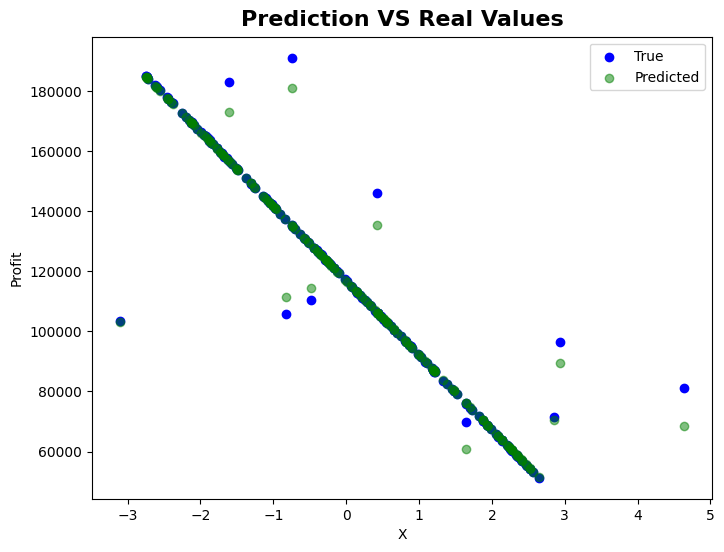

In [51]:
plot_predictions(rd_test,pred)

In [52]:
lr.coef_

array([ -145.5748776 ,  -258.92038683, 37413.56195642,   -48.4189952 ,
        2177.26483219])

In [53]:
# The Intersection with the y axis also called bias
lr.intercept_

119017.0177100751

In [54]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [55]:
lr.rank_

5

**Our Linear Regression model did really good**

# Lasso

In [56]:
lasso = Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [57]:
train_evaluation(lasso,"Lasso")

R2 Score: 0.998
Mean Squared Error: 2436024.071
Mean Absolute Error: 365.977


In [58]:
test_evaluation(lasso,"Lasso")

R2 Score: 0.998
Mean Squared Error: 3324259.487
Mean Absolute Error: 468.260


In [59]:
cross(lasso,"Lasso")

Values of 5 Cross Validation Scores: [0.9973322132509838, 0.9959163052874556, 0.9988001827287369, 0.999205649059854, 0.9996198699957479]


**Lasso also did really good**

# Random Forest Regressor

In [60]:
rf = RandomForestRegressor()
rf = RandomizedSearchCV(rf,param_distributions={
    "n_estimators": [80,100,120],
    "max_depth": [4,6,8],
    "max_features":[1,2,3]
})

In [61]:
rf.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'max_features': [1, 2, 3],
                                        'n_estimators': [80, 100, 120]})

In [62]:
rf.best_estimator_

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=80)

In [63]:
rf.best_params_

{'n_estimators': 80, 'max_features': 3, 'max_depth': 8}

In [64]:
rf.best_score_

0.9968046316740266

In [65]:
rf.best_index_

3

In [66]:
rf.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'max_features': [1, 2, 3],
                                        'n_estimators': [80, 100, 120]})>

In [67]:
pd.DataFrame(rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.415707,0.028720,0.012720,0.001061,120,2,8,"{'n_estimators': 120, 'max_features': 2, 'max_...",0.997591,0.987007,0.997950,0.998740,0.997197,0.995697,0.004375,4
1,0.280715,0.017295,0.009582,0.001026,100,3,6,"{'n_estimators': 100, 'max_features': 3, 'max_...",0.998152,0.988582,0.997704,0.999205,0.997833,0.996295,0.003893,3
2,0.204122,0.002017,0.007449,0.000307,100,2,6,"{'n_estimators': 100, 'max_features': 2, 'max_...",0.998232,0.985509,0.996018,0.998889,0.997327,0.995195,0.004938,6
3,0.259386,0.007323,0.007533,0.000336,80,3,8,"{'n_estimators': 80, 'max_features': 3, 'max_d...",0.998271,0.990023,0.998284,0.999323,0.998123,0.996805,0.003418,1
4,0.168245,0.004549,0.008148,0.000458,100,2,4,"{'n_estimators': 100, 'max_features': 2, 'max_...",0.995797,0.984005,0.993265,0.996788,0.992811,0.992533,0.004519,10
5,0.192716,0.002106,0.006277,0.000631,80,3,6,"{'n_estimators': 80, 'max_features': 3, 'max_d...",0.997771,0.990051,0.997010,0.999141,0.998074,0.996409,0.003252,2
6,0.171719,0.002099,0.007028,0.000793,80,1,8,"{'n_estimators': 80, 'max_features': 1, 'max_d...",0.996886,0.979857,0.995015,0.997833,0.996428,0.993204,0.006735,8
7,0.250856,0.001425,0.009339,0.000336,120,1,8,"{'n_estimators': 120, 'max_features': 1, 'max_...",0.997595,0.980956,0.994876,0.997899,0.995128,0.993291,0.006290,7
8,0.132456,0.001215,0.006567,0.000114,80,1,6,"{'n_estimators': 80, 'max_features': 1, 'max_d...",0.995775,0.981183,0.995347,0.997504,0.994920,0.992946,0.005947,9
9,0.199407,0.005604,0.007361,0.000500,100,3,4,"{'n_estimators': 100, 'max_features': 3, 'max_...",0.996837,0.990074,0.996378,0.998580,0.996189,0.995611,0.002895,5


In [68]:
best_rf = RandomForestRegressor(n_estimators=100,max_depth=8,max_features=3)

In [69]:
best_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, max_features=3)

In [70]:
train_evaluation(best_rf,"Random Forest Regressor")

R2 Score: 0.999
Mean Squared Error: 937664.255
Mean Absolute Error: 217.752


In [71]:
test_evaluation(best_rf,"Random Forest Regressor")

R2 Score: 0.997
Mean Squared Error: 5360089.259
Mean Absolute Error: 554.863


In [72]:
rf_pred = best_rf.predict(x_test)

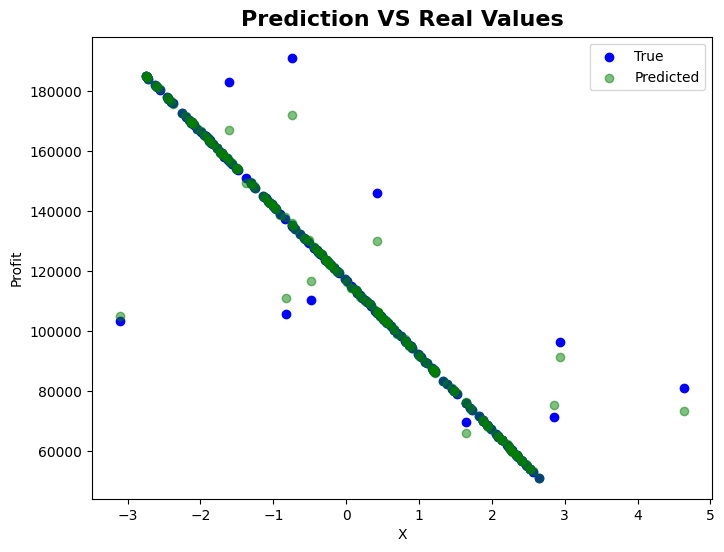

In [73]:
plot_predictions(rd_test,rf_pred)

**The Best Model So far**

# Support Vector Regressor

In [74]:
svr = SVR()

In [75]:
svr = RandomizedSearchCV(estimator=svr,param_distributions={
    "kernel":["rbf",'poly','linear','sigmoid'],
    "C":[1,3,5,10],
})

In [76]:
svr.fit(x_train,y_train)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': [1, 3, 5, 10],
                                        'kernel': ['rbf', 'poly', 'linear',
                                                   'sigmoid']})

In [77]:
svr.best_estimator_

SVR(C=10, kernel='linear')

In [78]:
svr.best_index_

4

In [79]:
svr.best_params_

{'kernel': 'linear', 'C': 10}

In [80]:
svr.best_score_

0.5676741736619503

In [81]:
pd.DataFrame(svr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020656,0.001173,0.004627,0.000493,linear,5,"{'kernel': 'linear', 'C': 5}",0.331441,0.309492,0.314596,0.313587,0.280237,0.309871,0.016612,2
1,0.022265,0.000478,0.013710,0.000556,rbf,1,"{'kernel': 'rbf', 'C': 1}",0.004109,-0.003557,-0.007942,-0.009234,-0.069458,-0.017216,0.026534,10
2,0.017726,0.000273,0.004509,0.000327,poly,10,"{'kernel': 'poly', 'C': 10}",0.263102,0.273624,0.262936,0.249243,0.225107,0.254803,0.016745,3
3,0.016912,0.000561,0.004691,0.000876,poly,3,"{'kernel': 'poly', 'C': 3}",0.090543,0.083270,0.077654,0.071517,0.021119,0.068820,0.024663,5
4,0.018285,0.000230,0.004071,0.000388,linear,10,"{'kernel': 'linear', 'C': 10}",0.589027,0.557476,0.568292,0.567449,0.556127,0.567674,0.011779,1
5,0.027496,0.000495,0.006449,0.000523,sigmoid,5,"{'kernel': 'sigmoid', 'C': 5}",0.072861,0.061803,0.059501,0.057613,0.001655,0.050686,0.025080,6
6,0.018076,0.000547,0.003866,0.000295,linear,3,"{'kernel': 'linear', 'C': 3}",0.207519,0.189407,0.191380,0.189980,0.146196,0.184896,0.020483,4
7,0.020707,0.000469,0.012774,0.000785,rbf,5,"{'kernel': 'rbf', 'C': 5}",0.032379,0.022207,0.018984,0.017975,-0.040526,0.010204,0.025872,8
8,0.020051,0.000456,0.012337,0.000674,rbf,10,"{'kernel': 'rbf', 'C': 10}",0.067067,0.053875,0.052063,0.051406,-0.004992,0.043884,0.025098,7
9,0.019750,0.000776,0.011969,0.000619,rbf,3,"{'kernel': 'rbf', 'C': 3}",0.018302,0.009373,0.005572,0.004422,-0.054935,-0.003453,0.026198,9


# Decision Tree Regressor

In [82]:
dt = DecisionTreeRegressor(max_depth=8,max_features=3)

In [83]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, max_features=3)

In [84]:
train_evaluation(dt,"Decision Tree Regressor")

R2 Score: 1.000
Mean Squared Error: 130234.217
Mean Absolute Error: 186.374


In [85]:
test_evaluation(dt,"Decision Tree Regressor")

R2 Score: 0.996
Mean Squared Error: 6617687.118
Mean Absolute Error: 692.683


Overfitting

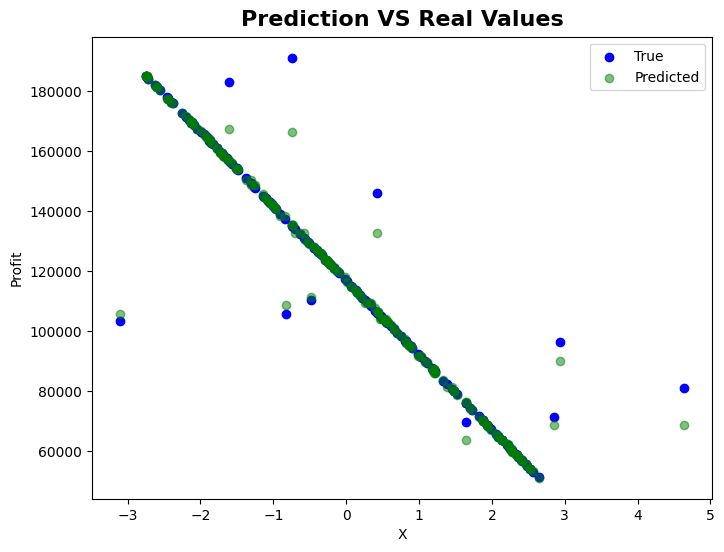

In [86]:
dt_pred = dt.predict(x_test)
plot_predictions(rd_test,dt_pred)

# XGB Regressor

In [87]:
xgb = XGBRegressor()
xgb = RandomizedSearchCV(xgb,
                        {
                            "n_estimators":[80,100,120,140],
                            "max_depth":[4,6,8]
                        })

In [88]:
xgb.fit(x_train,y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'n_estimators': [80, 100, 120, 140]})

In [89]:
xgb.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=120, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [90]:
xgb.best_index_

2

In [91]:
xgb.best_params_

{'n_estimators': 120, 'max_depth': 6}

In [92]:
xgb.best_score_

0.9977700469131452

In [93]:
pd.DataFrame(xgb.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.093355,0.005952,0.003844,0.000927,120,4,"{'n_estimators': 120, 'max_depth': 4}",0.997927,0.993476,0.999529,0.998624,0.998963,0.997704,0.002177,8
1,0.142307,0.005084,0.004958,0.000119,120,8,"{'n_estimators': 120, 'max_depth': 8}",0.997878,0.994110,0.999285,0.998470,0.999053,0.997759,0.001889,7
2,0.124164,0.003253,0.005054,0.000556,120,6,"{'n_estimators': 120, 'max_depth': 6}",0.998246,0.993854,0.999296,0.998399,0.999055,0.997770,0.001997,1
3,0.124899,0.002786,0.004938,0.000418,100,8,"{'n_estimators': 100, 'max_depth': 8}",0.997882,0.994112,0.999283,0.998468,0.999052,0.997759,0.001887,6
4,0.146198,0.001377,0.005206,0.000368,140,6,"{'n_estimators': 140, 'max_depth': 6}",0.998239,0.993849,0.999298,0.998401,0.999056,0.997769,0.001999,3
5,0.123903,0.009335,0.005255,0.000474,140,4,"{'n_estimators': 140, 'max_depth': 4}",0.997929,0.993442,0.999547,0.998626,0.998968,0.997702,0.002193,9
6,0.083125,0.001841,0.005882,0.000529,80,4,"{'n_estimators': 80, 'max_depth': 4}",0.997903,0.993479,0.999449,0.998610,0.998913,0.997671,0.002154,10
7,0.096144,0.006234,0.005211,0.000506,80,6,"{'n_estimators': 80, 'max_depth': 6}",0.998239,0.993853,0.999297,0.998390,0.999052,0.997766,0.001996,4
8,0.120723,0.013007,0.005245,0.000231,100,6,"{'n_estimators': 100, 'max_depth': 6}",0.998247,0.993853,0.999294,0.998395,0.999055,0.997769,0.001997,2
9,0.116998,0.006850,0.005412,0.000380,80,8,"{'n_estimators': 80, 'max_depth': 8}",0.997892,0.994110,0.999280,0.998465,0.999051,0.997759,0.001887,5


In [94]:
best_xgb = XGBRegressor(n_estimators=140,max_depth=4)

In [95]:
best_xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=140, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [96]:
train_evaluation(best_xgb,"XGB Resgressor")

R2 Score: 1.000
Mean Squared Error: 16089.515
Mean Absolute Error: 88.578


In [97]:
test_evaluation(best_xgb,"XGB Regressor")

R2 Score: 0.997
Mean Squared Error: 5205994.933
Mean Absolute Error: 609.717


In [98]:
cross(best_xgb,"XGB Regressor")

Values of 5 Cross Validation Scores: [0.9979286682534628, 0.9934423942049433, 0.9995469579050925, 0.9986255252737988, 0.9989678106063344]


In [99]:
xgb_pred = best_xgb.predict(x_test)

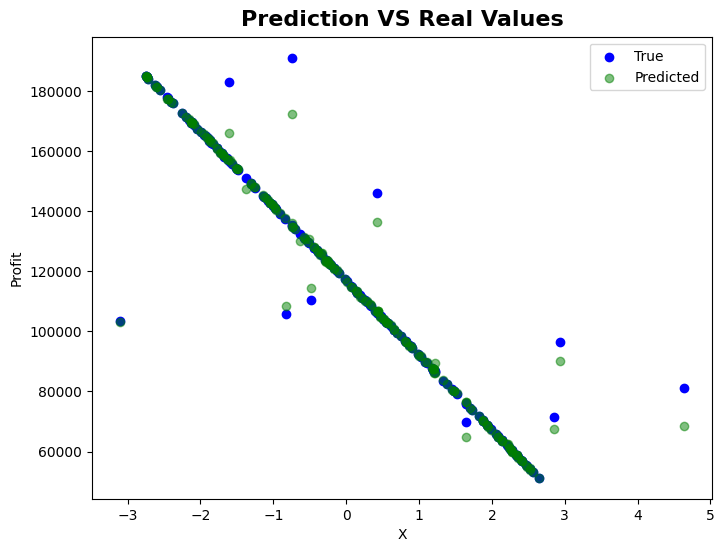

In [100]:
plot_predictions(rd_test,xgb_pred)

In [101]:
for model in [lr,lasso,best_rf,svr,best_xgb,dt]:
    name = str(model)
    idx = name.index('(')
    name = name[:idx]
    if model == svr:
        name = 'SVR'
    print(f'{name}:')
    cross(model,name)
    print('-'*50)

LinearRegression:
Values of 5 Cross Validation Scores: [0.9973338732670923, 0.9958773236541193, 0.9988012026151949, 0.9992066006562927, 0.9996201494216691]
--------------------------------------------------
Lasso:
Values of 5 Cross Validation Scores: [0.9973322132509838, 0.9959163052874556, 0.9988001827287369, 0.999205649059854, 0.9996198699957479]
--------------------------------------------------
RandomForestRegressor:
Values of 5 Cross Validation Scores: [0.998135505670468, 0.9901884631902071, 0.9979650651391535, 0.9992267758797666, 0.9982896098722679]
--------------------------------------------------
SVR:
Values of 5 Cross Validation Scores: [0.3314413067294647, 0.5574762601328597, 0.5682918479095634, 0.5674486236449949, 0.5561268187947241]
--------------------------------------------------
XGBRegressor:
Values of 5 Cross Validation Scores: [0.9979286682534628, 0.9934423942049433, 0.9995469579050925, 0.9986255252737988, 0.9989678106063344]
-----------------------------------------

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Saving Model
    </h1>
    </div>

In [102]:
import pickle

In [103]:
ohe = OneHotEncoder(drop='first')

In [104]:
ohe.fit_transform([['New York'],['California'],['Florida']])

<3x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [105]:
ohe.transform([['California']]).toarray()

array([[0., 0.]])

In [106]:
pipeline = Pipeline(steps=[('encoder',ohe),
                          ('scaler',sc),
                          ('RandomForest',best_rf)])

In [107]:
pipeline.named_steps['encoder'].transform([['Florida']]).toarray()

array([[1., 0.]])

In [108]:
pipeline

Pipeline(steps=[('encoder', OneHotEncoder(drop='first')),
                ('scaler', StandardScaler()),
                ('RandomForest',
                 RandomForestRegressor(max_depth=8, max_features=3))])

In [109]:
with open('pipeline.pkl','wb') as f:
    pickle.dump(pipeline,f)

In [110]:
with open("lr.pkl",'wb') as f:
    pickle.dump(lr,f)

Now we are ready to deploy our model

In [111]:
x_train

,Florida,New York,R&D Spend,Administration,Marketing Spend
585,0,1,-1.347713,-1.047375,-1.332567
630,0,0,0.976783,0.759698,0.958192
474,0,1,-1.302013,-1.011848,-1.287530
805,0,1,0.858416,0.667679,0.841542
529,0,0,1.620292,1.259965,1.592361
...,...,...,...,...,...
951,1,0,-1.047666,-0.814117,-1.036875
679,0,1,-0.986230,-0.766356,-0.976330
375,0,1,0.839101,0.652663,0.822508
191,0,1,1.462476,1.137278,1.436836


In [112]:
y_train

585     65471.17370
630    157591.12080
474     67282.27141
805    152900.20690
529    183093.42680
           ...     
951     77362.05529
679     79796.78570
375    152134.76180
191    176839.15970
621     77667.89160
Name: Profit, Length: 793, dtype: float64

In [113]:
x_test

,Florida,New York,R&D Spend,Administration,Marketing Spend
286,1,0,0.728106,0.566375,0.713124
680,0,0,0.654166,0.508894,0.640258
218,1,0,-0.730891,-0.567855,-0.724698
426,1,0,-0.101976,-0.078934,-0.104910
324,1,0,-1.476471,-1.147472,-1.459456
...,...,...,...,...,...
393,0,0,0.120294,0.093860,0.114134
912,0,0,0.399755,0.311114,0.389539
206,0,0,1.281357,0.996475,1.258345
574,0,0,1.449995,1.127575,1.424535


In [114]:
y_test

286    147736.01560
680    144805.79620
218     89915.86699
426    114839.81770
324     60368.49134
           ...     
393    123648.41610
912    134723.44940
206    169661.40360
574    176344.52500
41      71498.49000
Name: Profit, Length: 199, dtype: float64

In [115]:
training = pd.concat((x_train,y_train),axis=1)

In [116]:
testing = pd.concat((x_test,y_test),axis=1)

In [117]:
training.to_csv('training.csv',index=False)

In [118]:
testing.to_csv('testing.csv',index=False)